# **Computação Visual (2024.1) - Atividade Prática 3**
*Prof. André Kishimoto*

### **Observação**: Os exercícios da semana estão no final deste *notebook*!

# **Filtros com `SciPy` e `scikit-image`**

Nesta semana, além de implementar um filtro passa-baixa "do zero", usaremos as bibliotecas `SciPy` e `scikit-image` para aplicar filtros em imagens.

Execute as duas células seguintes para verificar se você possui as bibliotecas instaladas. Caso não as possua, consulte a documentação de cada uma para ver como proceder com a instalação.

- [SciPy](https://www.scipy.org/)

- [scikit-image](https://scikit-image.org/)

In [ ]:
import scipy
scipy.__version__

In [ ]:
import skimage
skimage.__version__

## **Conversão de RGB para tons de cinza**

Usando o `scikit-image`, podemos converter uma imagem colorida para uma imagem em tons de cinza usando a função `rgb2gray()`.

Aproveitaremos também a função `io.imread()` do `scikit-image` para fazer a leitura de um arquivo de imagem.

In [ ]:
from skimage import io
from skimage.color import rgb2gray

img_filename = 'kodim23.png'
img_original = io.imread(img_filename)
img_gray = rgb2gray(img_original)

A seguir, exibiremos a imagem original e sua versão em escala de cinza usando o `Matplotlib`.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

fig, axs = plt.subplots(1, 2, figsize=(16, 16))
axs[0].set_title('img_original')
axs[0].imshow(img_original, cmap=plt.cm.gray)
axs[1].set_title('img_gray')
axs[1].imshow(img_gray, cmap=plt.cm.gray)
plt.show()

## **Filtro passa baixa com `SciPy`**

O pacote `scipy.ndimage` oferece uma função chamada `generic_filter()` que pode ser usada para aplicar filtros genéricos (criados por nós) em uma imagem.

Em linhas gerais, precisamos definir:

- Um *kernel* no formato `(linha, coluna)`;

- Um array 1D de tamanho `linha * coluna` contendo os pesos de cada posição do *kernel*;

- Uma função *callback* que recebe os dois valores (*kernel* e pesos) e retorna um escalar, que será usado na aplicação do filtro na imagem.

Para mais informações sobre a função `generic_filter()`, [consulte este link](https://docs.scipy.org/doc/scipy/reference/generated/scipy.ndimage.generic_filter.html).

Na célula seguinte, temos um exemplo de código Python para definir os itens listados acima.

In [ ]:
size = 5
kernel = np.ones((size, size), np.uint8)
pesos = np.full((1, size * size), 1 / (size * size))

def callback_function(buffer, weights):
    return (buffer * weights).sum()

Observe que definimos a variável `size = 5`, usada para definir o tamanho do *kernel* e do array de pesos. O peso de cada pixel é `1 / (size * size)` - nesse caso, `1/25`. Isso equivale a um filtro de suavização de tamanho 5x5 com o seguinte formato:

              | 1 1 1 1 1 |
              | 1 1 1 1 1 |
    K = 1/25  | 1 1 1 1 1 |
              | 1 1 1 1 1 |
              | 1 1 1 1 1 |

In [ ]:
print(f'kernel: {kernel}')
print(f'pesos: {pesos}')

Com o *kernel*, pesos e função definidos, vamos chamar a função `generic_filter()` do `SciPy`.

In [ ]:
from scipy.ndimage import generic_filter
img_filtered = generic_filter(input=img_gray, function=callback_function, footprint=kernel, extra_arguments=(pesos,))

Observe que passamos a imagem a ser filtrada (em tons de cinza) no parâmetro `input`, nossa função *callback* no parâmetro `function`, o *kernel* no parâmetro `footprint` e os pesos como `extra_arguments`.

A imagem filtrada é salva na variável `img_filtered`.

A seguir, exibimos a imagem original em tons de cinza e a imagem filtrada.

In [ ]:
fig, axs = plt.subplots(1, 2, figsize=(16, 16))
axs[0].set_title('img_gray')
axs[0].imshow(img_gray, cmap=plt.cm.gray)
axs[1].set_title('img_filtered')
axs[1].imshow(img_filtered, cmap=plt.cm.gray)
plt.show()

## **Filtro gaussiano com `scikit-image`**

O `scikit-image` oferece diversos filtros, sendo um deles o filtro gaussiano, via função `gaussian()` do módulo `filters`.

Para aplicar o filtro gaussiano em uma imagem, devemos passar pelo menos dois parâmetros:

- A imagem a ser filtrada, no parâmetro `image`;

- O desvio padrão do kernel gaussiano, no parâmetro `sigma`.

O sigma pode ser um único escalar (aplicado nos dois eixos) ou uma sequência de valores para cada eixo.

Para mais informações sobre a função `gaussian()` e outros filtros do `scikit-image`, [consulte este link](https://scikit-image.org/docs/dev/api/skimage.filters.html#skimage.filters.gaussian).

A seguir, temos um exemplo de código Python que filtra uma imagem em tons de cinza e exibe o resultado do filtro gaussiano (com `sigma=3`) ao lado da imagem original.

In [ ]:
from skimage.filters import gaussian
img_gaussian = gaussian(image=img_gray, sigma=3)

fig, axs = plt.subplots(1, 2, figsize=(16, 16))
axs[0].set_title('img_gray')
axs[0].imshow(img_gray, cmap=plt.cm.gray)
axs[1].set_title('img_gaussian')
axs[1].imshow(img_gaussian, cmap=plt.cm.gray)
plt.show()

---
# **Exercícios - Atividade Prática 3**

**Observação**: *Ao enviar as alterações com sua solução final no repositório git, certifique-se que o notebook está com todas as saídas executadas, de forma que, ao abrir o arquivo no GitHub (navegador), todas as saídas estarão visíveis.*

**Atividade em grupo de até 4 pessoas.**

Por favor, insira a identificação de cada integrante do grupo na célula Python a seguir:

In [ ]:
# Identificação do grupo:
# - Lucas Teixeira Soares, 10388847
# - Mateus Fernandes Castanharo, 10389418

## **Exercício 1**

Na célula a seguir, implemente a função `blur3x3(img_color)` em Python que:

- Recebe como parâmetro `img_color` um array `NumPy` contendo os dados de uma imagem colorida.

- Faz a convolução do filtro (kernel) de desfoque/suavização (blur) de tamanho 3x3 com a imagem `img_color`, isto é, aplica o filtro na imagem.

- Quando o filtro está passando nas bordas da imagem, considere que as partes do filtro que ficam fora da imagem possuem o valor zero.

- Retorna um array `NumPy` com o resultado da convolução.

**Observações**:

- Neste exercício, você não deve usar bibliotecas/pacotes adicionais, a não ser o `NumPy`.

- Para a aplicação do filtro, fica a seu critério criar uma matriz de convolução ou operar diretamente nos pixels da imagem.

In [107]:
import numpy as np

def blur3x3(img_color):
    height = len(img_color)
    width = len(img_color[0])
    x = img_color.shape[2]

    img_blur = np.zeros((height, width, x), dtype=img_color.dtype)

    for i in range(height):
        for j in range(width):
            sum = np.array([1, 1, 1], dtype=np.uint16)
            sum = sum + img_color[i][j]

            if j - 1 >= 0 and i - 1 >= 0:
                sum = sum + img_color[i-1][j-1]

            if j - 1 >= 0:
                sum = sum + img_color[i][j-1]

            if j - 1 >= 0 and i + 1 < height:
                sum = sum + img_color[i+1][j-1]

            # --------------------------------

            if i - 1 >= 0:
                sum = sum + img_color[i-1][j]

            if i + 1 < height:
                sum = sum + img_color[i+1][j]

            # --------------------------------

            if j + 1 < width and i - 1 >= 0:
                sum = sum + img_color[i-1][j-1]

            if j + 1 < width:
                sum = sum + img_color[i][j-1]

            if j + 1 < width and i + 1 < height:
                sum = sum + img_color[i+1][j-1]

            sum = sum//9

            img_blur[i][j] = sum


    return img_blur

Na célula a seguir, escreva um código para testar a sua função `blur3x3(img_color)` e exibir o resultado na saída do notebook (exibição com `Matplotlib`).

Original: (512, 768, 3) <class 'numpy.ndarray'>
Interpolação: (512, 768, 3) <class 'numpy.ndarray'>


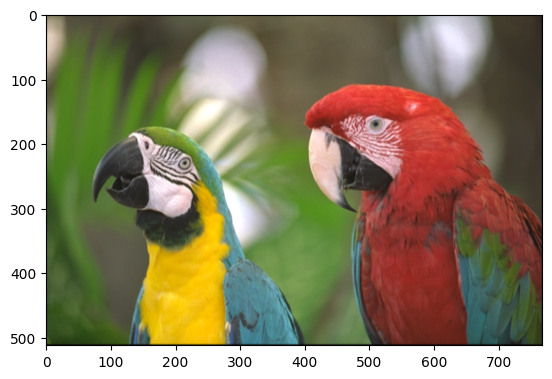

In [118]:
# TODO: Testar a função blur3x3(img_color).
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

img = Image.open('kodim23.png')
img_array = np.array(img)
img_blurred = blur3x3(img_array)
print(f'Original: {img_array.shape} {type(img_array)}')
print(f'Interpolação: {img_blurred.shape} {type(img_blurred)}')
plt.imshow(img_blurred)
plt.show()

## **Exercício 2**

O arquivo de imagem `kodim23-salt_and_pepper.png` que está disponível no mesmo local deste *notebook* possui ruído do tipo sal e pimenta (*salt and pepper noise*). Vimos em aula que um filtro do tipo mediana pode ser usado para remover esse tipo de ruído.

Usando o `scikit-image`, aplique um filtro de mediana para remover o ruído *salt and pepper* da imagem `kodim23-salt_and_pepper.png`.

In [123]:
from skimage.filters.rank import median
from skimage.morphology import disk

def median_filter(img_color):
    img_blur = median(img_color, disk(1))

    return img_blur

Original: (512, 768) <class 'numpy.ndarray'>
Interpolação: (512, 768) <class 'numpy.ndarray'>


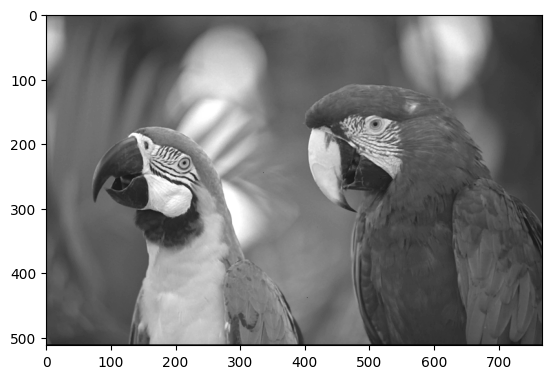

In [132]:
# TODO: Testar a função median_filter(img_color).
import numpy as np
import matplotlib.pyplot as plt
import cv2

img = cv2.imread('kodim23-salt_and_pepper.png', cv2.IMREAD_GRAYSCALE)
img_array = np.array(img)
img_interpolated = median_filter(img_array)
print(f'Original: {img_array.shape} {type(img_array)}')
print(f'Interpolação: {img_interpolated.shape} {type(img_interpolated)}')
plt.imshow(img_interpolated, cmap='gray')
plt.show()

## **Exercício 3**

Explique como funciona o filtro de mediana e porque é um bom filtro para remover ruído do tipo *salt and pepper*.

In [ ]:
# TODO: Responder e remover esse comentário TODO.
'''
Um filtro de mediana consiste na análise individual de cada pixel
comparando-o com seus pixels vizinhos e o substituindo pela mediana desses
valores, isso ajuda na remoção desse tipo de ruido pois normalmente são
pixeis que não se encaixam no contexto da imagem.
'''

## **Exercício 4**

Faça uma pesquisa sobre como é possível aplicar os operadores de gradiente Roberts, Prewitt e Sobel para detectar bordas em uma imagem, usando a linguagem Python.

Para cada operador, apresente o código que exemplifica a operação e exiba (com `Matplotlib`): a imagem original (de entrada), a imagem resultante da operação na horizontal, a imagem resultante da operação na vertical e a imagem representando a magnitude do gradiente.

A imagem de entrada pode ser o arquivo `kodim23.png` disponibilizado junto com este *notebook*.

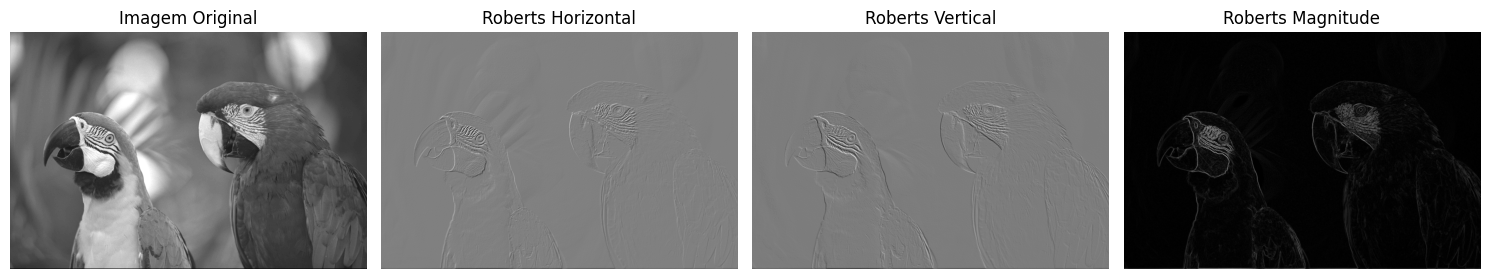

In [136]:
import matplotlib.pyplot as plt
from skimage import io, filters
import numpy as np

# Carregar a imagem
image = io.imread('kodim23.png', as_gray=True)

# Operador de gradiente Roberts
roberts_horizontal = filters.roberts_pos_diag(image)
roberts_vertical = filters.roberts_neg_diag(image)
roberts_magnitude = np.sqrt(roberts_horizontal**2 + roberts_vertical**2)

# Exibir as imagens original e resultantes
plt.figure(figsize=(15, 12))

plt.subplot(4, 4, 1)
plt.imshow(image, cmap='gray')
plt.title('Imagem Original')
plt.axis('off')

plt.subplot(4, 4, 2)
plt.imshow(roberts_horizontal, cmap='gray')
plt.title('Roberts Horizontal')
plt.axis('off')

plt.subplot(4, 4, 3)
plt.imshow(roberts_vertical, cmap='gray')
plt.title('Roberts Vertical')
plt.axis('off')

plt.subplot(4, 4, 4)
plt.imshow(roberts_magnitude, cmap='gray')
plt.title('Roberts Magnitude')
plt.axis('off')

plt.tight_layout()
plt.show()

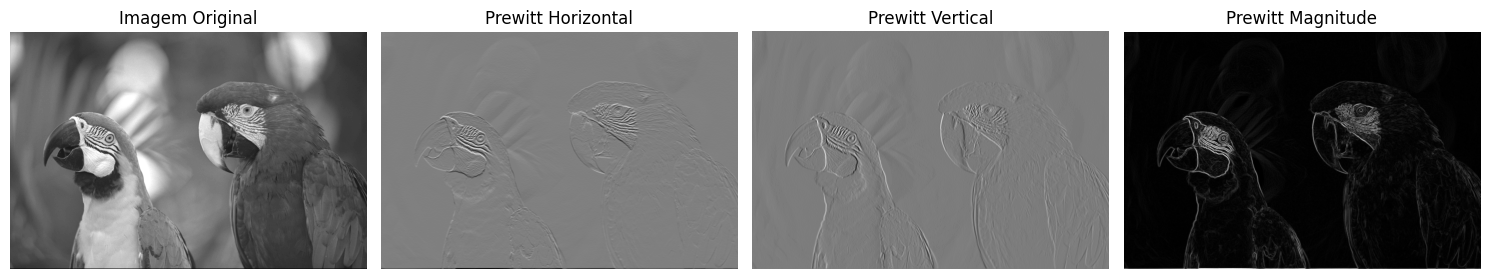

In [135]:
import matplotlib.pyplot as plt
from skimage import io, filters
import numpy as np

# Carregar a imagem
image = io.imread('kodim23.png', as_gray=True)

# Operador de gradiente Prewitt
prewitt_horizontal = filters.prewitt_h(image)
prewitt_vertical = filters.prewitt_v(image)
prewitt_magnitude = np.sqrt(prewitt_horizontal**2 + prewitt_vertical**2)

# Exibir as imagens original e resultantes
plt.figure(figsize=(15, 12))

plt.subplot(4, 4, 5)
plt.imshow(image, cmap='gray')
plt.title('Imagem Original')
plt.axis('off')

plt.subplot(4, 4, 6)
plt.imshow(prewitt_horizontal, cmap='gray')
plt.title('Prewitt Horizontal')
plt.axis('off')

plt.subplot(4, 4, 7)
plt.imshow(prewitt_vertical, cmap='gray')
plt.title('Prewitt Vertical')
plt.axis('off')

plt.subplot(4, 4, 8)
plt.imshow(prewitt_magnitude, cmap='gray')
plt.title('Prewitt Magnitude')
plt.axis('off')

plt.tight_layout()
plt.show()

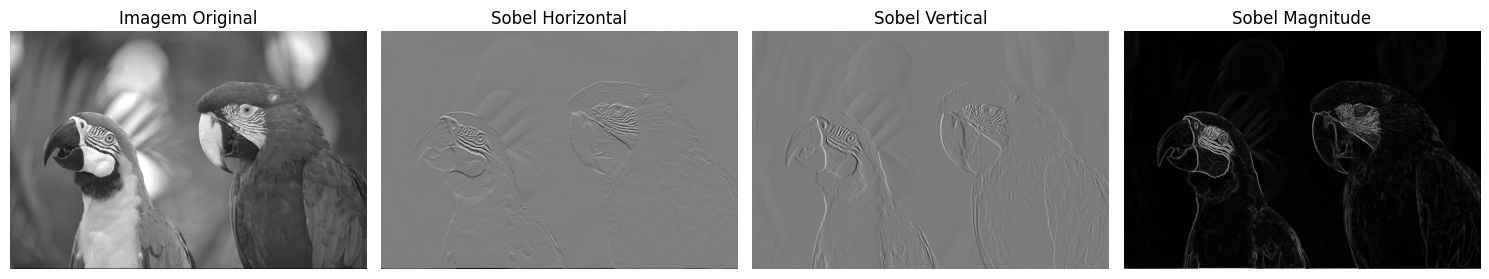

In [137]:
import matplotlib.pyplot as plt
from skimage import io, filters
import numpy as np

# Carregar a imagem
image = io.imread('kodim23.png', as_gray=True)

# Operador de gradiente Sobel
sobel_horizontal = filters.sobel_h(image)
sobel_vertical = filters.sobel_v(image)
sobel_magnitude = np.sqrt(sobel_horizontal**2 + sobel_vertical**2)

# Exibir as imagens original e resultantes
plt.figure(figsize=(15, 12))

plt.subplot(4, 4, 9)
plt.imshow(image, cmap='gray')
plt.title('Imagem Original')
plt.axis('off')

plt.subplot(4, 4, 10)
plt.imshow(sobel_horizontal, cmap='gray')
plt.title('Sobel Horizontal')
plt.axis('off')

plt.subplot(4, 4, 11)
plt.imshow(sobel_vertical, cmap='gray')
plt.title('Sobel Vertical')
plt.axis('off')

plt.subplot(4, 4, 12)
plt.imshow(sobel_magnitude, cmap='gray')
plt.title('Sobel Magnitude')
plt.axis('off')

plt.tight_layout()
plt.show()